In [1]:
#так называемый плохой способ проверки модели
from sklearn.datasets import load_iris 
iris = load_iris()
X = iris.data
y = iris.target

In [38]:
#классификатор k-средних 
#в данном случае гиперпараметр отвечает за соответсттвие близжайших неизвестных меток
#если при k=1 точность 100% то при k=100 только 66%
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [39]:
model.fit(X, y)
y_model = model.predict(X)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [42]:
#хороший способ проверки модели - ОТЛОЖЕННЫЕ ДАННЫЕ
from sklearn.model_selection import train_test_split
#разделяем данные по 50% в каждом наборе
X1, X2, y1, y2 = train_test_split(X, y, random_state =0, test_size=0.5)
#обучение модели на одном из наборов
model.fit(X1, y1)
#оцениаем работу на другом
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)
#при измеенении гиперпараметра n_neighors -> 1000+ будет сильно снижаться точность(логично)
#КОНЕЦ ПРИМЕРА МОДЕЛИ С "СОСЕДЯМИ"

0.9066666666666666

In [46]:
#мето перекрестной проверки для модели
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [101]:
#пятиблочная перекрестная проверка
from sklearn.model_selection import LeaveOneOut

cross_val_score(model, X, y, cv = 5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [105]:
#проверка по отдельным объектам (leave-one-out cross-validation)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [106]:
scores.mean()

0.96

In [104]:
#КОНЕЦ ПРИМЕРА МОДЕЛИ С СОСЕДНИМИ АПРОКСИМИЗАЦИЯМИ

In [20]:
#Кривые проверки и pipeline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


In [21]:
import numpy as np
def make_data(N, err=0.1, rseed=1):
    #создаем случайные выборки данных
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y+=err * rng.randn(N)
    return X, y
X, y = make_data(40)

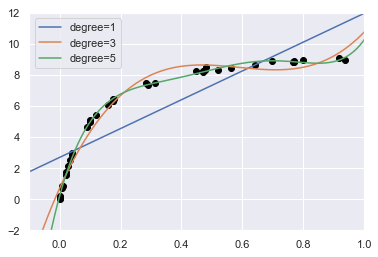

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #формат рисовки графика

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test  = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')
#чем выше степень, тем выше точность, но выше 7 степени уже будет слишком высока дисперисия(переобучение)
#лучше аппроксимация при 3

Text(0, 0.5, 'score')

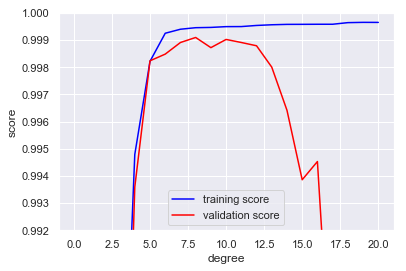

In [96]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score') # Оценка обучения
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score') # Оценка проверки
plt.legend(loc='best') # 
plt.ylim(0.992, 1)
plt.xlabel('degree') # Степень
plt.ylabel('score') # Оценка

(-0.05673314103942452,
 0.994263633135634,
 -0.4831360966851558,
 9.571996304930929)

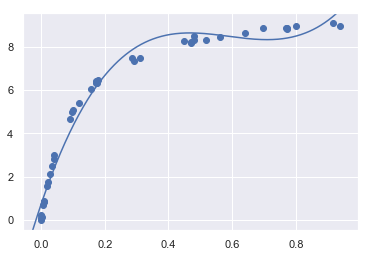

In [100]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

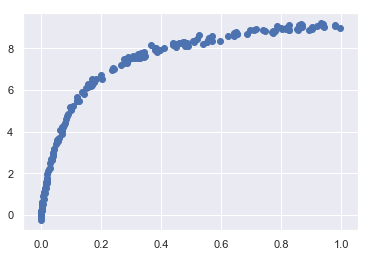

In [99]:
#теперь сгенерируем 200 точек
#покажем зависимость от размера обучающейся последовательности
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

Text(0, 0.5, 'score')

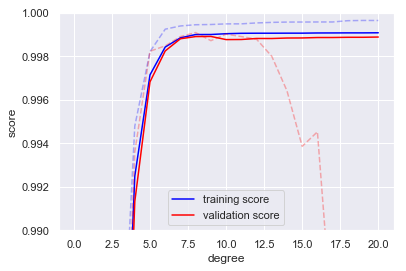

In [104]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha = 0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha = 0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0.99, 1)
plt.xlabel('degree')
plt.ylabel('score')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: only integer scalar arrays can be converted to a scalar index

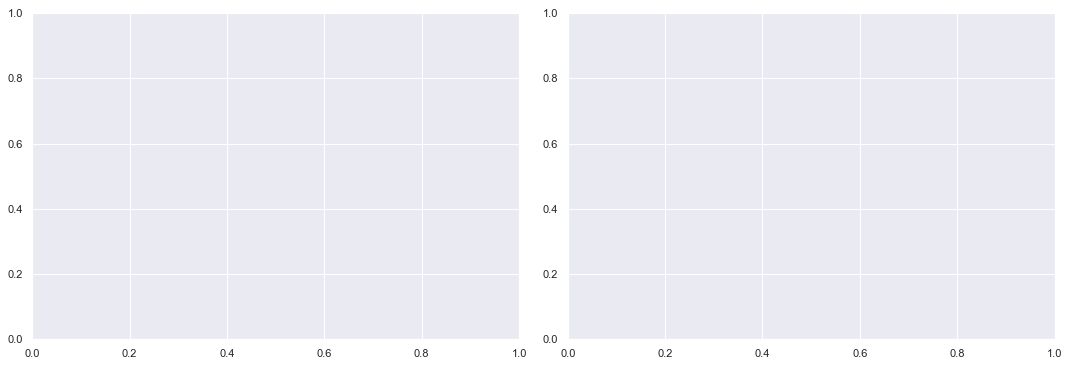

In [121]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(
        PolynomialRegression(degree), X, y, cv=7)
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(X, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size') # размерность обучения
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')